$s$

In [1]:
import ipywidgets as widgets
out = widgets.Output()
with out:
    
    %bookmark 'model_dir'
    current_dir = %pwd
    while 'models' in current_dir:
        %cd ..
        current_dir = %pwd
    %bookmark 'base_dir'
    %cd source_code
    out.clear_output()
%run base
%run gui_v5_vehicles
with out:
    %cd ..
    %cd models/st100_v1/front_suspension
    out.clear_output()

In [2]:
m=model()
m.show()

## VEHICLE DYNAMICS MODELING AND SIMULATION TOOL

In [6]:
m.joints['jcl_uca_rev'].u_j

array([[ -134.],
       [ -343.],
       [ 1000.]])

In [94]:
m.data_flow.edges[('hpl_ucaf','jcl_uca_rev')]['attr']
m.data_flow.node['jcl_uca_rev']['obj'].__setattr__(m.data_flow.edges[('hpl_ucaf','jcl_uca_rev')]['attr'],m.points['hpl_ucaf'])


In [96]:
m.data_flow.node['jcl_uca_rev']['obj'].location

point object at [ -130.  -334.  1000.]

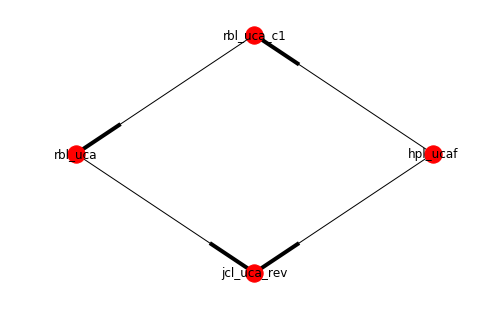

In [5]:
p1 = nx.path_graph(list(nx.all_simple_paths(m.data_flow,'hpl_ucaf','jcl_uca_rev'))[0],create_using=nx.DiGraph())
p2 = nx.path_graph(list(nx.all_simple_paths(m.data_flow,'hpl_ucaf','jcl_uca_rev'))[1],create_using=nx.DiGraph())
nx.draw_circular(nx.compose(p1,p2),with_labels=True)
plt.show()

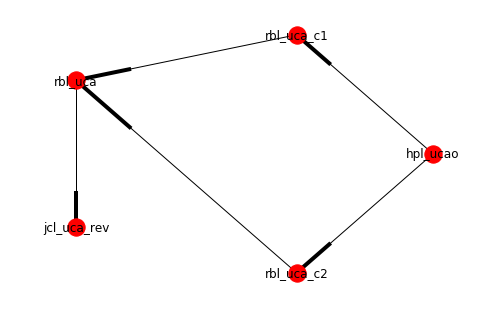

In [9]:
nx.draw_circular(nx.DiGraph(nx.edge_dfs(m.data_flow,'hpl_ucao')),with_labels=True)
plt.show()

In [67]:
for e in nx.edge_dfs(m.data_flow,'hpr_ucaf'):
    print(m.data_flow.edges[e])

{}
{}
{}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

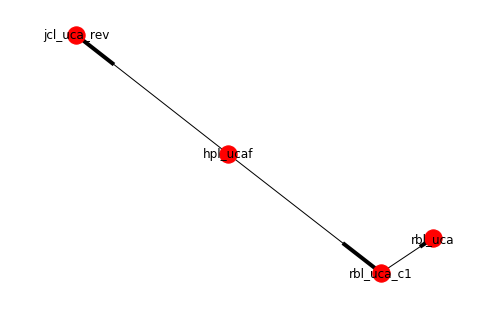

In [57]:
ucaf_tree = nx.bfs_tree(m.data_flow,'hpl_ucaf')
nx.draw(ucaf_tree,with_labels=True)
plt.show()

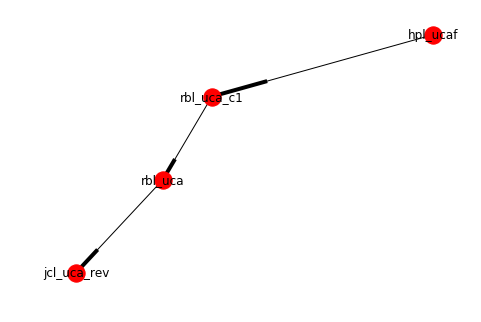

In [55]:
nx.draw(nx.dfs_tree(m.data_flow,'hpl_ucaf'),with_labels=True)
plt.show()

[('rbl_uca_c1', 'hpl_ucaf'),
 ('jcl_uca_rev', 'hpl_ucaf'),
 ('rbl_uca', 'rbl_uca_c1')]

In [6]:
dep_geo = nx.DiGraph()
dep_geo.add_edge('geometry_body1','body1')


In [7]:
dep_joint = nx.DiGraph()
dep_joint.add_edge('p1','joint_1')
dep_joint.add_edge('body1','joint_1')
dep_joint.add_edge('body2','joint_1')

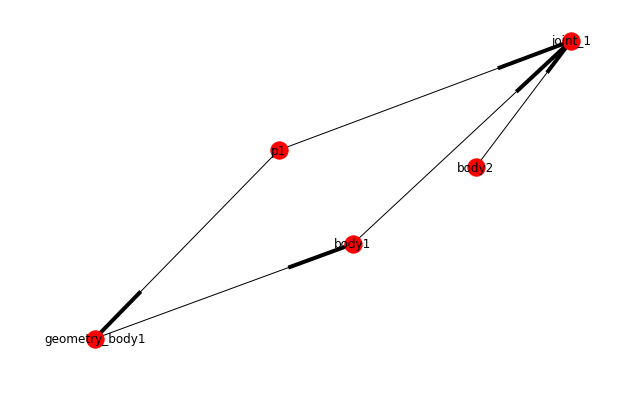

In [8]:
dep_all = nx.compose_all([dep,dep_geo,dep_joint])
plt.figure(figsize=(8,5))
nx.draw_spring(dep_all,with_labels=True)
plt.show()

In [10]:
list(nx.all_simple_paths(dep_all,'p1','joint_1'))

[['p1', 'geometry_body1', 'body1', 'joint_1'], ['p1', 'joint_1']]

In [19]:
dep_all.add_node('p2',l=[1,2,3])

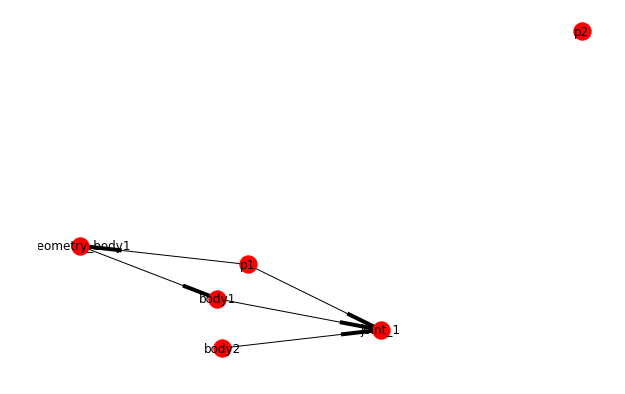

In [15]:
plt.figure(figsize=(8,5))
nx.draw_spring(dep_all,with_labels=True)
plt.show()

In [22]:
dep_all.nodes

NodeView(('p1', 'geometry_body1', 'joint_1', 'body1', 'body2', 'p2'))

In [18]:
p=m.points['hpl_ucaf']

In [21]:
p.__dict__['alignment']

'L'

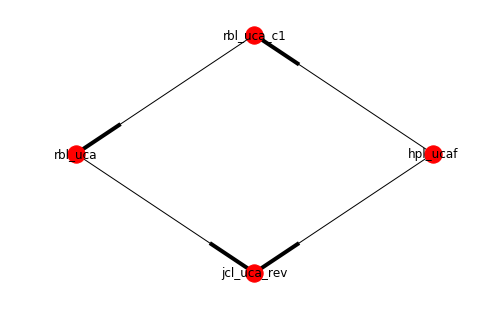

In [25]:
nx.draw_circular(nx.DiGraph(nx.edge_dfs(m.data_flow,'hpl_ucaf')),with_labels=True)
plt.show()

In [55]:
m.data_flow.node['rbs_chassis']['obj'].__setattr()

rbs_chassis

In [59]:
for n in m.data_flow:
    print(n['obj'])

TypeError: string indices must be integers

In [49]:
b._mass

50